In [18]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pylab as plt

import math
import sys
import os
import yaml
import numpy as np

import so3g
from so3g.hk.getdata import HKArchiveScanner

In [2]:
cd ../git/so-rox-calibration/bin/

/home/sab267/git/so-rox-calibration/bin


In [3]:
from roxcal.data import trim_data, \
                        cluster_time_and_data_arrays, \
                        extract_temperature_data, \
                        extract_temperature_verification_data

from roxcal.cal import Calibration
from uncertainties_ver_runs import get_sensor_data

In [4]:
temperatures = [0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06, 0.055]

In [5]:
temperatures2 = [0.220, 0.2, 0.195, 0.19, 0.185, 0.18,
                0.175, 0.17, 0.165, 0.16, 0.155, 0.15, 0.145, 0.14, 0.135,
                0.13, 0.125, 0.12, 0.115, 0.11, 0.105, 0.1, 0.095, 0.09,
                0.085, 0.08, 0.075, 0.07, 0.065, 0.06]

In [6]:
with open('verification_runs_files.yaml', 'r') as f:
    all_verify_runs = yaml.safe_load(f)

In [7]:
all_verify_data = []
for file in all_verify_runs['files']:
    #print(file)
    data = get_sensor_data(file)
    #print(data)
    all_verify_data.append(data)

In [8]:
len(all_verify_data)

5

In [9]:
lsroxtemps = all_verify_data[0]['CAL']['temp_avg']

In [10]:
x031temps = all_verify_data[0]['X-031']['temp_avg']

In [11]:
x031 = all_verify_data[0]['X-031']['temp_avg']
x032 = all_verify_data[0]['X-032']['temp_avg']
x102 = all_verify_data[0]['X-102']['temp_avg']
x001 = all_verify_data[0]['X-001']['temp_avg']
x111 = all_verify_data[0]['X-111']['temp_avg']
x083 = all_verify_data[1]['X-083']['temp_avg']
x075 = all_verify_data[1]['X-075']['temp_avg']
x035 = all_verify_data[1]['X-035']['temp_avg']
x076 = all_verify_data[1]['X-076']['temp_avg']
x029 = all_verify_data[1]['X-029']['temp_avg']
x090 = all_verify_data[1]['X-090']['temp_avg']
x039 = all_verify_data[1]['X-039']['temp_avg']
x050 = all_verify_data[2]['X-050']['temp_avg']
x021 = all_verify_data[2]['X-021']['temp_avg']
x038 = all_verify_data[2]['X-038']['temp_avg']
x092 = all_verify_data[2]['X-092']['temp_avg']
x026 = all_verify_data[2]['X-026']['temp_avg']
#x001
x057 = all_verify_data[3]['X-057']['temp_avg']
x044 = all_verify_data[3]['X-044']['temp_avg']
x113 = all_verify_data[3]['X-113']['temp_avg']
x097 = all_verify_data[3]['X-097']['temp_avg']
#x001
x068 = all_verify_data[4]['X-068']['temp_avg'] 
x071 = all_verify_data[4]['X-071']['temp_avg']
x079 = all_verify_data[4]['X-079']['temp_avg']
x064 = all_verify_data[4]['X-064']['temp_avg']

roxes = np.array([x031, x032, x102, x001, x111, x083, x075, x035, x076, x029, x090, x039, x050, x021, x038, x092, x026, x057, x044, x113, x097, x068, x071, x079, x064])

#for i in all_verify_data[4]:
 #   print(i)
     #= all_verify_data[0][i]['temp_avg']

/home/sab267/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [15]:
roxes = np.concatenate((x031, x032, x102, x111))

In [16]:
roxes = np.sort(roxes)

In [19]:
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[10, 8]

Text(0.5, 0, 'LS ROX Temperatures [K]')

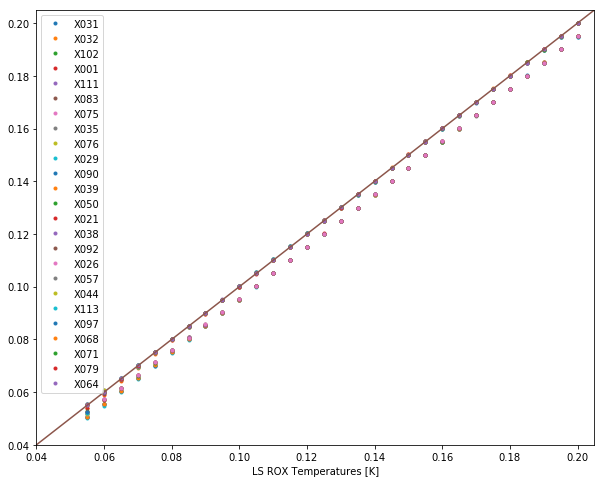

In [40]:
x = np.arange(0,10)
plt.plot(lsroxtemps, x031, '.', label = 'X031')
plt.plot(lsroxtemps, x032, '.', label = 'X032')
plt.plot(lsroxtemps, x102, '.', label = 'X102')
plt.plot(lsroxtemps, x001, '.', label = 'X001')
plt.plot(lsroxtemps, x111, '.', label = 'X111')
plt.plot(lsroxtemps, x083[1:], '.', label = 'X083')
plt.plot(lsroxtemps, x075[1:], '.', label = 'X075')
plt.plot(lsroxtemps, x035[1:], '.', label = 'X035')
plt.plot(lsroxtemps, x076[1:], '.', label = 'X076')
plt.plot(lsroxtemps, x029[1:], '.', label = 'X029')
plt.plot(lsroxtemps, x090[1:], '.', label = 'X090')
plt.plot(lsroxtemps, x039[1:], '.', label = 'X039')
plt.plot(lsroxtemps, x050[1:], '.', label = 'X050')
plt.plot(lsroxtemps, x021[1:], '.', label = 'X021')
plt.plot(lsroxtemps, x038[1:], '.', label = 'X038')
plt.plot(lsroxtemps, x092[1:], '.', label = 'X092')
plt.plot(lsroxtemps, x026[1:], '.', label = 'X026')
plt.plot(lsroxtemps, x057, '.', label = 'X057')
plt.plot(lsroxtemps, x044, '.', label = 'X044')
plt.plot(lsroxtemps, x113, '.', label = 'X113')
plt.plot(lsroxtemps, x097, '.', label = 'X097')
plt.plot(lsroxtemps, x068[1:], '.', label = 'X068')
plt.plot(lsroxtemps, x071[1:], '.', label = 'X071')
plt.plot(lsroxtemps, x079[1:], '.', label = 'X079')
plt.plot(lsroxtemps, x064[1:], '.', label = 'X064')
plt.plot(x)
plt.legend()
plt.ylim(0.04,0.205)
plt.xlim(0.04,0.205) #not the linear fit; just a raw one to one line
plt.xlabel("LS ROX Temperatures [K]")

In [21]:
linfit = np.polyfit(lsroxtemps, x031, 1) #but we want the linfit of the entire set of roxes

In [22]:
#plt.plot(lsroxtemps, x031, '.', label = 'X031')
print(linfit)

[9.99417229e-01 1.89705998e-04]


In [23]:
xp = np.linspace(0, 0.2, 100)
#plt.plot(lsroxtemps, x031, '.')
p = np.poly1d(linfit)
p_eval = p(np.linspace(0.055, 0.2, len(lsroxtemps)))
len(p_eval)

30

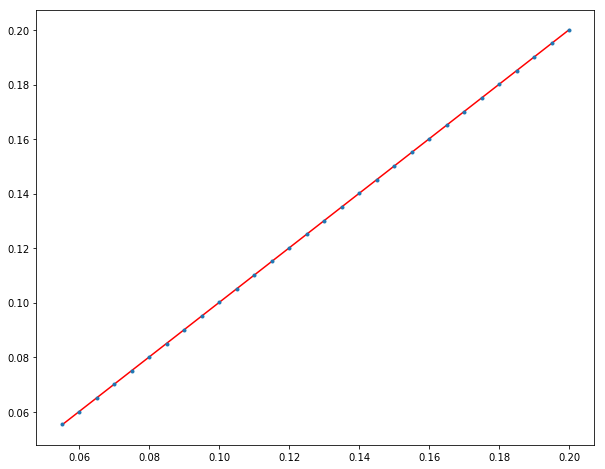

In [24]:
plt.plot(np.linspace(0.055, 0.2, len(lsroxtemps)), p_eval, color = 'r')
plt.plot(lsroxtemps, x031, '.', label = 'X031')

#### Trying this argsort thing for a few roxes

In [25]:
roxes_trial = np.concatenate((x031, x032))
len(roxes_trial)

60

In [26]:
new_set = roxes_trial.argsort()
len(new_set)

60

In [27]:
new_set

array([59, 29, 58, 28, 57, 27, 56, 26, 55, 25, 54, 24, 53, 23, 52, 22, 51,
       21, 50, 20, 49, 19, 48, 18, 47, 17, 16, 46, 15, 45, 14, 44, 13, 43,
       12, 42, 11, 41, 10, 40,  9, 39,  8, 38,  7, 37,  6, 36,  5, 35,  4,
       34,  3, 33, 32,  2,  1, 31,  0, 30])

In [28]:
## concatenate lsroxtemps just as many times
lsrox_trial = np.concatenate((lsroxtemps,lsroxtemps))

In [29]:
lsrox_trial

array([0.19999402, 0.19498118, 0.19001604, 0.18501311, 0.18001578,
       0.17498371, 0.17002033, 0.16501989, 0.15998413, 0.15501889,
       0.15000529, 0.14500071, 0.14002613, 0.13498969, 0.13001713,
       0.12499782, 0.1199936 , 0.11501549, 0.10998544, 0.10500969,
       0.10000733, 0.09501333, 0.08996328, 0.08499386, 0.07998044,
       0.07499201, 0.06999079, 0.06498134, 0.05999251, 0.05502889,
       0.19999402, 0.19498118, 0.19001604, 0.18501311, 0.18001578,
       0.17498371, 0.17002033, 0.16501989, 0.15998413, 0.15501889,
       0.15000529, 0.14500071, 0.14002613, 0.13498969, 0.13001713,
       0.12499782, 0.1199936 , 0.11501549, 0.10998544, 0.10500969,
       0.10000733, 0.09501333, 0.08996328, 0.08499386, 0.07998044,
       0.07499201, 0.06999079, 0.06498134, 0.05999251, 0.05502889])

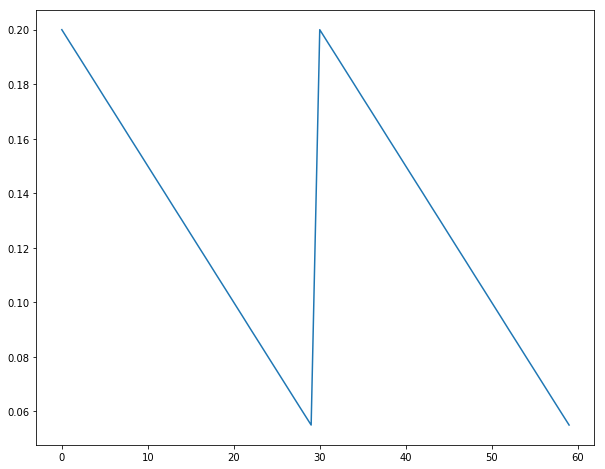

In [30]:
plt.plot(lsrox_trial)

In [31]:
lsrox_trial2 = lsrox_trial[np.argsort(roxes_trial)]

In [32]:
lsrox_trial2

array([0.05502889, 0.05502889, 0.05999251, 0.05999251, 0.06498134,
       0.06498134, 0.06999079, 0.06999079, 0.07499201, 0.07499201,
       0.07998044, 0.07998044, 0.08499386, 0.08499386, 0.08996328,
       0.08996328, 0.09501333, 0.09501333, 0.10000733, 0.10000733,
       0.10500969, 0.10500969, 0.10998544, 0.10998544, 0.11501549,
       0.11501549, 0.1199936 , 0.1199936 , 0.12499782, 0.12499782,
       0.13001713, 0.13001713, 0.13498969, 0.13498969, 0.14002613,
       0.14002613, 0.14500071, 0.14500071, 0.15000529, 0.15000529,
       0.15501889, 0.15501889, 0.15998413, 0.15998413, 0.16501989,
       0.16501989, 0.17002033, 0.17002033, 0.17498371, 0.17498371,
       0.18001578, 0.18001578, 0.18501311, 0.18501311, 0.19001604,
       0.19001604, 0.19498118, 0.19498118, 0.19999402, 0.19999402])

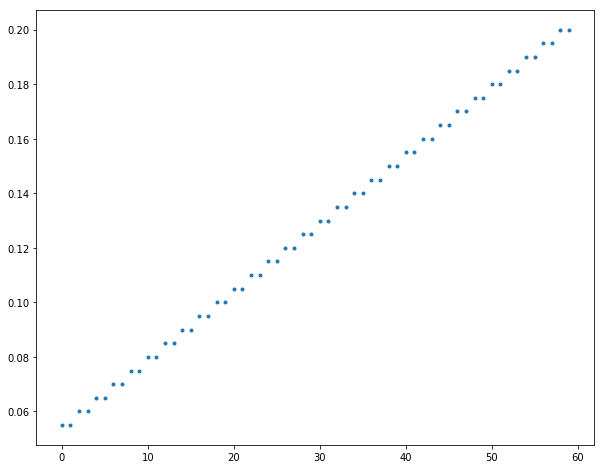

In [33]:
plt.plot(lsrox_trial2, '.')

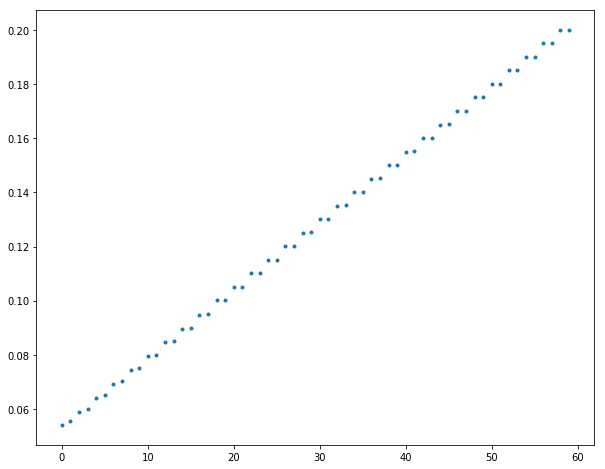

In [34]:
plt.plot(roxes_trial[np.argsort(roxes_trial)], '.')

In [35]:
roxestrial_2 = roxes_trial[np.argsort(roxes_trial)]

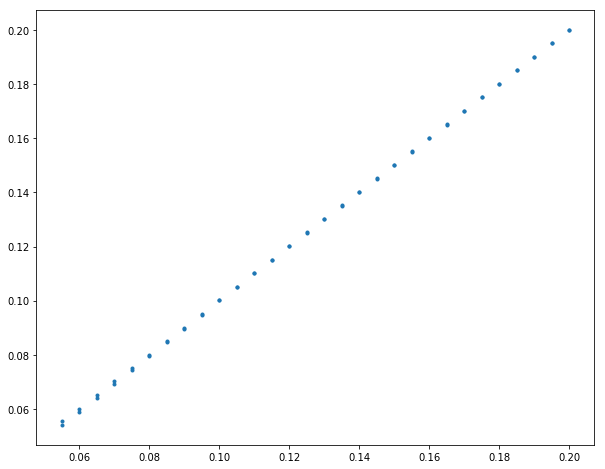

In [39]:
plt.plot(lsrox_trial2, roxestrial_2, '.')
#plt.plot(x)
#plt.ylim(0.04,0.2)
#plt.xlim(0.04,0.2) #not the linear fit; just a raw one to one line

In [37]:
#let's just concatenate all roxes i say and concatenate lsrox just as many times and go from there i guess
